In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.mlab as mlab
from warnings import filterwarnings
'exec(% matplotlib inline)'
filterwarnings(action='ignore')

In [2]:
df=pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Data Cleansing

In [3]:
df.dropna(axis = 0, inplace = True)

In [4]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [5]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [6]:
df.rename(columns ={'Heart Disease':'Target'}, inplace = True)
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [7]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.Target.value_counts()

Target
0    150
1    120
Name: count, dtype: int64

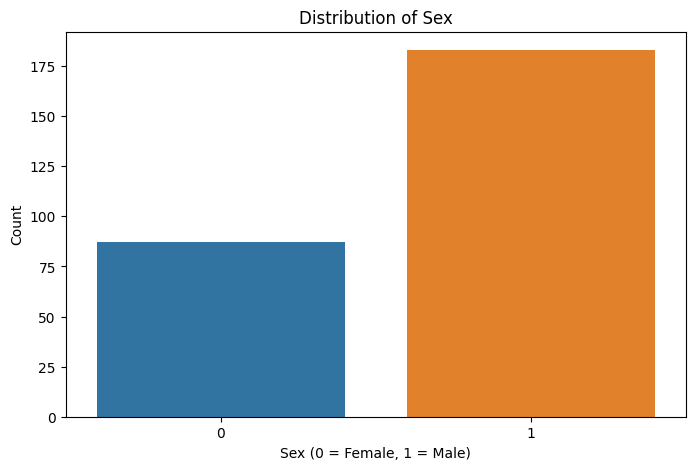

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df)
plt.title('Distribution of Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

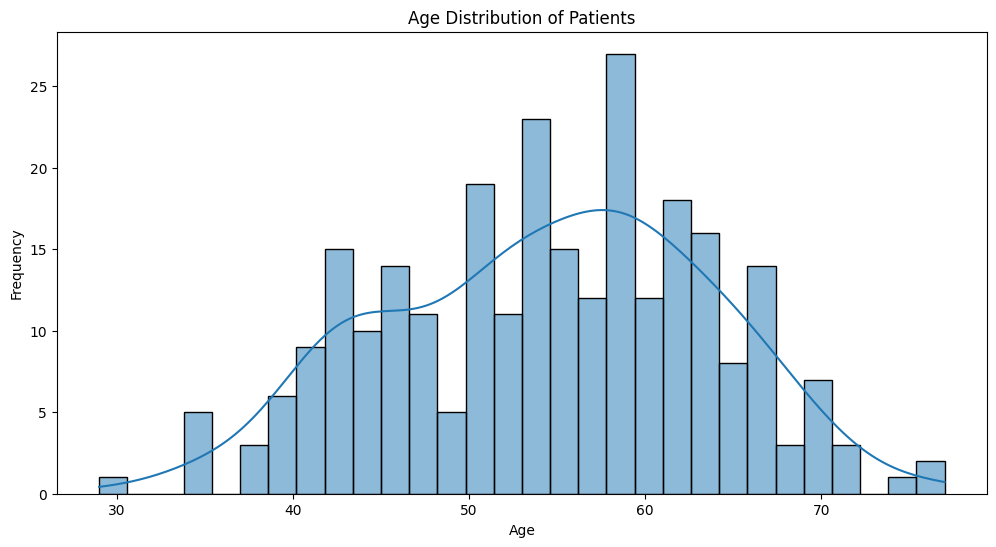

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

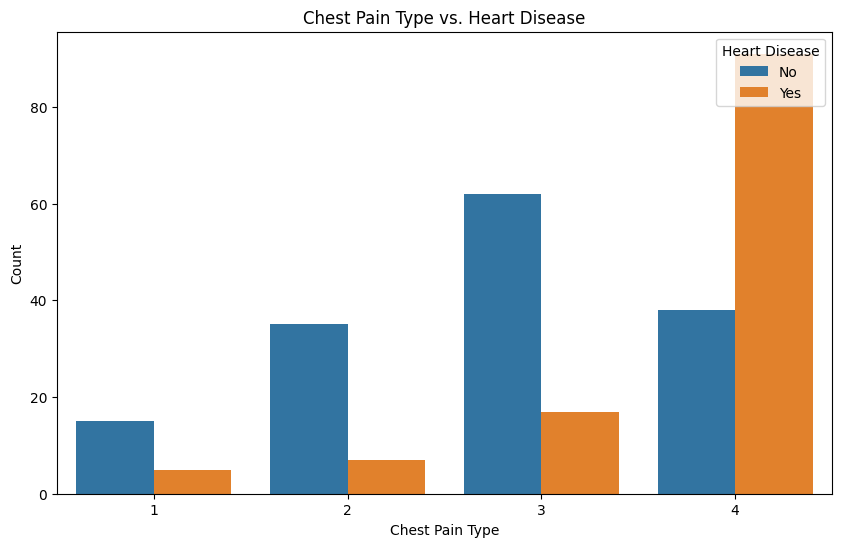

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Chest pain type', hue='Target', data=df)
plt.title('Chest Pain Type vs. Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.show()

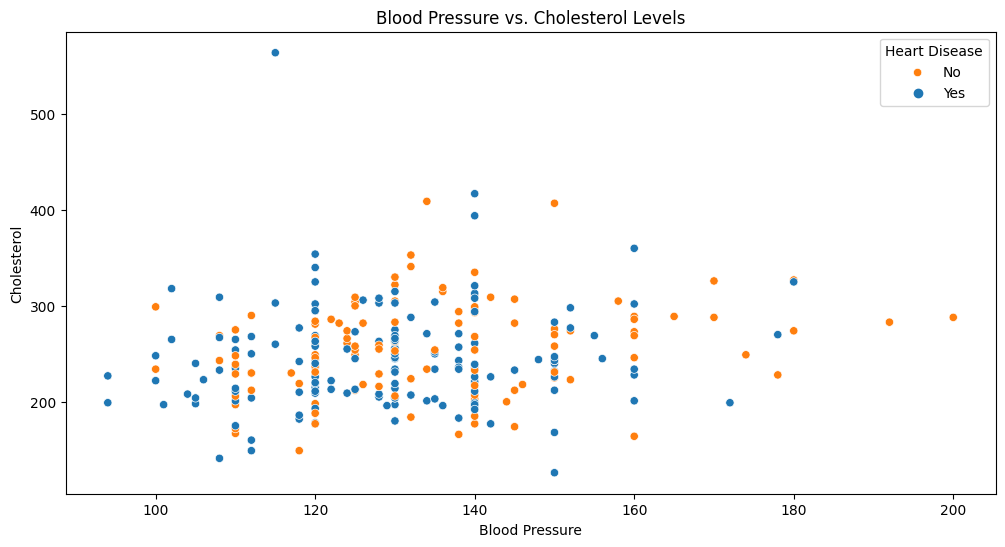

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='BP', y='Cholesterol', hue='Target', data=df)
plt.title('Blood Pressure vs. Cholesterol Levels')
plt.xlabel('Blood Pressure')
plt.ylabel('Cholesterol')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.show()

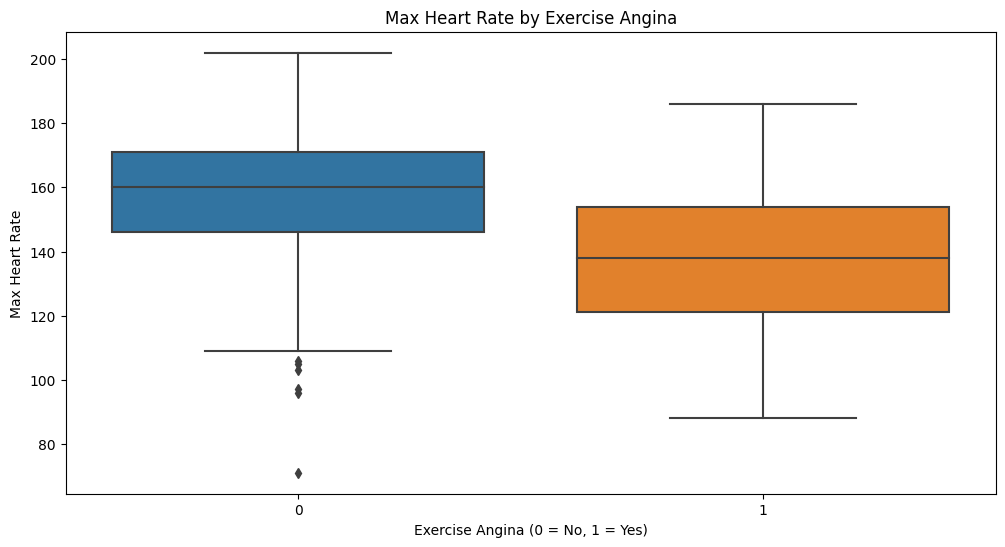

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Exercise angina', y='Max HR', data=df)
plt.title('Max Heart Rate by Exercise Angina')
plt.xlabel('Exercise Angina (0 = No, 1 = Yes)')
plt.ylabel('Max Heart Rate')
plt.show()

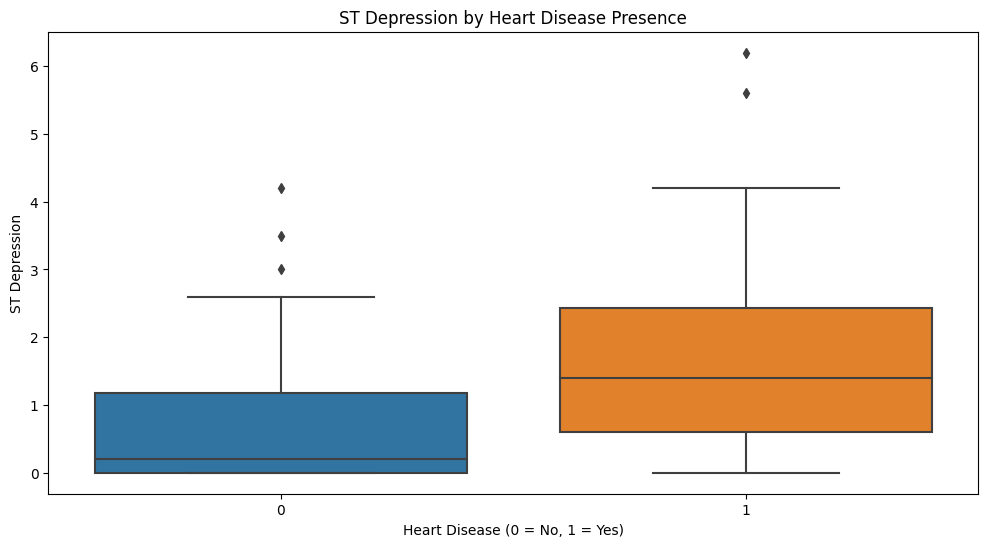

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Target', y='ST depression', data=df)
plt.title('ST Depression by Heart Disease Presence')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('ST Depression')
plt.show()

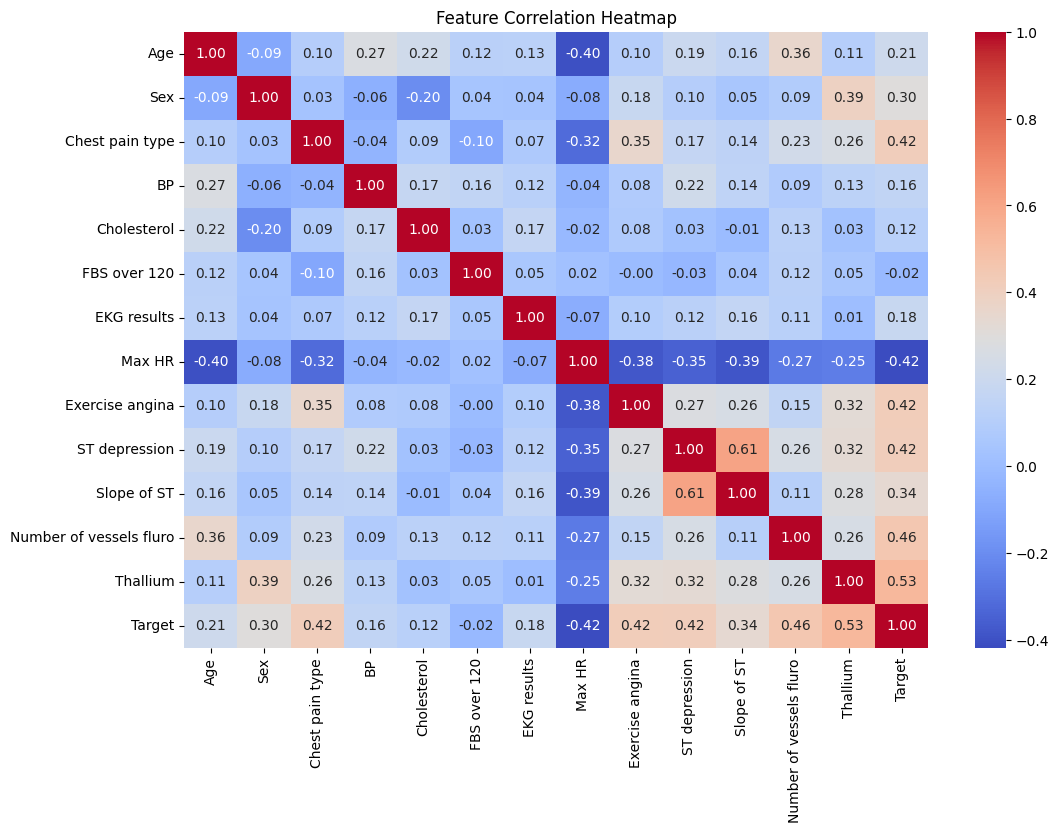

In [17]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

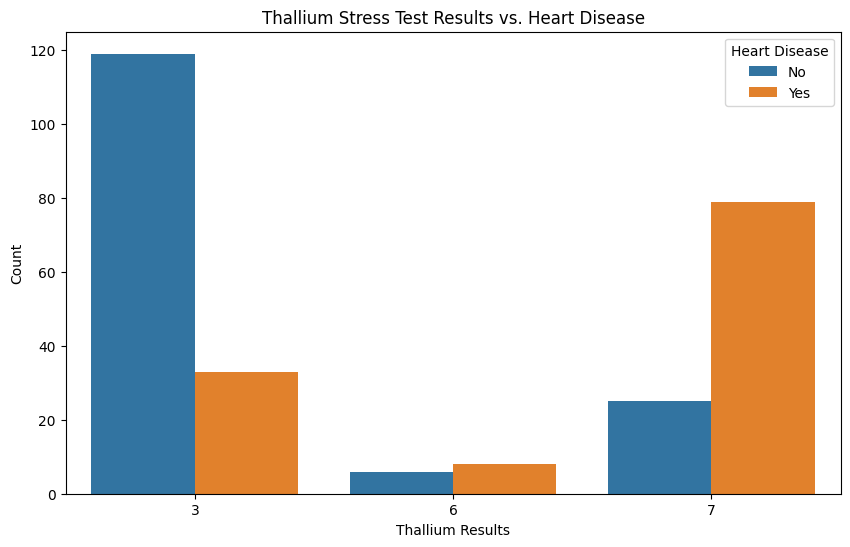

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Thallium', hue='Target', data=df)
plt.title('Thallium Stress Test Results vs. Heart Disease')
plt.xlabel('Thallium Results')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [19]:
X=df.drop("Target" , axis=1).values

y=df["Target"].values

## Train/Test dataset

In [20]:
from sklearn.model_selection import train_test_split
train_x ,test_x, train_y , test_y = train_test_split(X , y , test_size=0.2 , random_state=10)

## Modeling

In [21]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score ,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
svc=SVC(kernel='sigmoid' , gamma=0.1)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnb=GaussianNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [23]:
clfs= {'SVC' : svc,'KN' : knc, 'NB': gnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc,'GBDT':gbdt}

In [24]:
def train_classifier(clf , train_x , test_x , train_y , test_y):
    clf.fit(train_x , train_y)
    y_pred=clf.predict(test_x)
    accuracy=accuracy_score(y_pred ,test_y )
    precision=precision_score(y_pred ,test_y)

    return accuracy,precision

In [25]:
train_classifier(svc,train_x , test_x , train_y , test_y)

(0.48148148148148145, 0.0)

In [26]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,  train_x , test_x , train_y , test_y)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.48148148148148145
Precision -  0.0
For  KN
Accuracy -  0.6666666666666666
Precision -  0.5357142857142857
For  NB
Accuracy -  0.8518518518518519
Precision -  0.8214285714285714
For  DT
Accuracy -  0.8148148148148148
Precision -  0.8571428571428571
For  LR
Accuracy -  0.9074074074074074
Precision -  0.8571428571428571
For  RF
Accuracy -  0.7962962962962963
Precision -  0.75
For  AdaBoost
Accuracy -  0.7777777777777778
Precision -  0.75
For  BgC
Accuracy -  0.8148148148148148
Precision -  0.8571428571428571
For  ETC
Accuracy -  0.8333333333333334
Precision -  0.8214285714285714
For  GBDT
Accuracy -  0.8148148148148148
Precision -  0.8571428571428571


In [27]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
3,DT,0.814815,0.857143
4,LR,0.907407,0.857143
7,BgC,0.814815,0.857143
9,GBDT,0.814815,0.857143
2,NB,0.851852,0.821429
8,ETC,0.833333,0.821429
5,RF,0.796296,0.750000
6,AdaBoost,0.777778,0.750000
1,KN,0.666667,0.535714
0,SVC,0.481481,0.000000


In [28]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
4,LR,0.907407,0.857143
2,NB,0.851852,0.821429
8,ETC,0.833333,0.821429
3,DT,0.814815,0.857143
7,BgC,0.814815,0.857143
9,GBDT,0.814815,0.857143
5,RF,0.796296,0.750000
6,AdaBoost,0.777778,0.750000
1,KN,0.666667,0.535714
0,SVC,0.481481,0.000000


In [29]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,LR,0.907407,0.857143,0.907407,0.857143,0.907407,0.857143,0.907407,0.857143
1,NB,0.851852,0.821429,0.851852,0.821429,0.851852,0.821429,0.851852,0.821429
2,ETC,0.833333,0.821429,0.833333,0.821429,0.833333,0.821429,0.833333,0.821429
3,DT,0.814815,0.857143,0.814815,0.857143,0.814815,0.857143,0.814815,0.857143
4,BgC,0.814815,0.857143,0.814815,0.857143,0.814815,0.857143,0.814815,0.857143
5,GBDT,0.814815,0.857143,0.814815,0.857143,0.814815,0.857143,0.814815,0.857143
6,RF,0.796296,0.750000,0.796296,0.750000,0.796296,0.750000,0.796296,0.750000
7,AdaBoost,0.777778,0.750000,0.777778,0.750000,0.777778,0.750000,0.777778,0.750000
8,KN,0.666667,0.535714,0.666667,0.535714,0.666667,0.535714,0.666667,0.535714
9,SVC,0.481481,0.000000,0.481481,0.000000,0.481481,0.000000,0.481481,0.000000


## Logistic Regression with Scikit-learn

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_x,train_y)
Y_pred = model.predict(test_x)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(test_y,Y_pred))

Accuracy Score: 0.9074074074074074


## Evaluation

[[25  1]
 [ 4 24]]


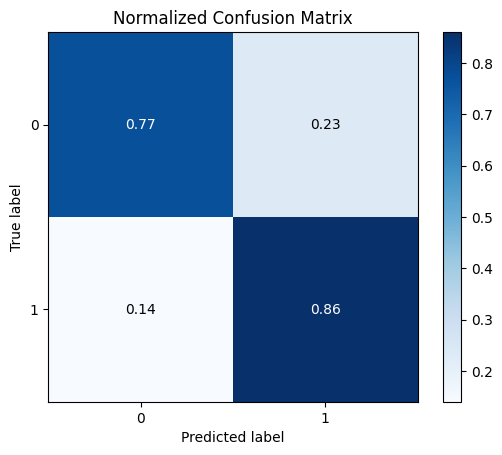

In [31]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
y_pred = clf.predict(test_x)
skplt.metrics.plot_confusion_matrix(test_y, y_pred, normalize = True)
confusion_mat = confusion_matrix(test_y,Y_pred)
print(confusion_mat)
plt.show()